In [1]:
# import modules
import numpy as np

# import plotting modules
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

from IPython.display import Latex

In [2]:
from velocity_Mwolf_code import VelocityStuff

In [3]:
# initiate the analysis by calling the entire class

analyze = VelocityStuff()

In [4]:
# importing all the data

dm_halo1 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_dm_Jeon17_halo1_0303.txt")

bin_size = 0.02

dx_dm_halo1 = dm_halo1[:,4] / 1000 # converting pc to kpc
dy_dm_halo1 = dm_halo1[:,5] / 1000 # converting pc to kpc
dz_dm_halo1 = dm_halo1[:,6] / 1000 # converting pc to kpc
r_dm_halo1 = np.sqrt(dx_dm_halo1**2 + dy_dm_halo1**2 + dz_dm_halo1**2)

vx_dm_COM = np.sum(dm_halo1[:,7]) / np.size(dm_halo1[:,7])
vy_dm_COM = np.sum(dm_halo1[:,8]) / np.size(dm_halo1[:,8])
vz_dm_COM = np.sum(dm_halo1[:,9]) / np.size(dm_halo1[:,9])

radius_array = np.arange(0.01, round(max(r_dm_halo1), 2), bin_size)

star_halo1 = np.loadtxt("D:/Research/ultra-faint dwarf galaxies/dm_profile_vel_Jeon17/dwarf_star_Jeon17_halo1_0303.txt")
star_mass_halo1 = star_halo1[:,11]

## CASE 1: The star positions & velocities are corrected according to the dark matter COM within $r_{vir}$.

In [5]:
# First, correct the stars' position and velocity measurements according to the dark matter COM.
x_star_case1 = star_halo1[:,4] / 1000
y_star_case1 = star_halo1[:,5] / 1000
z_star_case1 = star_halo1[:,6] / 1000
r_star_case1 = np.sqrt(x_star_case1**2 + y_star_case1**2 + z_star_case1**2)

vx_star_dm_vCOM = star_halo1[:,7] - vx_dm_COM
vy_star_dm_vCOM = star_halo1[:,8] - vy_dm_COM
vz_star_dm_vCOM = star_halo1[:,9] - vz_dm_COM

In [6]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof1, M_tot1, M_half1, r_half1 = analyze.star_mass_analysis(bin_size, radius_array, r_star_case1, star_mass_halo1)

In [7]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x1 = analyze.weighted_stdev(vx_star_dm_vCOM, star_mass_halo1, bin_size, r_star_case1, radius_array)
stdev_y1 = analyze.weighted_stdev(vy_star_dm_vCOM, star_mass_halo1, bin_size, r_star_case1, radius_array)
stdev_z1 = analyze.weighted_stdev(vz_star_dm_vCOM, star_mass_halo1, bin_size, r_star_case1, radius_array)

C:\Users\nguye\Binh_UFD\velocity analysis\velocity_Mwolf_code.py:131: RuntimeWarning: invalid value encountered in double_scalars
  weighted_mean = np.sum(velocity_array * enclosed_mass) / np.sum(enclosed_mass)
C:\Users\nguye\Binh_UFD\velocity analysis\velocity_Mwolf_code.py:132: RuntimeWarning: invalid value encountered in double_scalars
  unsquared_weighted_stdev = (np.sum(enclosed_mass * (velocity_array - weighted_mean)**2)) / np.sum(enclosed_mass)


In [8]:
# Finally, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_at_rhalf_x1, M_real1, M_wolf_x1 = analyze.Wolf_mass_at_rhalf(vx_star_dm_vCOM, star_mass_halo1, \
                                              bin_size, r_star_case1, r_dm_halo1, radius_array)
stdev_at_rhalf_y1, M_real1, M_wolf_y1 = analyze.Wolf_mass_at_rhalf(vy_star_dm_vCOM, star_mass_halo1, \
                                              bin_size, r_star_case1, r_dm_halo1, radius_array)
stdev_at_rhalf_z1, M_real1, M_wolf_z1 = analyze.Wolf_mass_at_rhalf(vz_star_dm_vCOM, star_mass_halo1, \
                                              bin_size, r_star_case1, r_dm_halo1, radius_array)

## CASE 2: The star positions & velocities are corrected according to the stellar COM within $r_{vir}$.

In [9]:
# First, find the stellar COM (both for position and velocity) within r_vir.
COM_x, COM_y, COM_z = analyze.find_star_COM(star_halo1[:,2][0], star_halo1[:,11], \
                                            star_halo1[:,4], star_halo1[:,5], star_halo1[:,6])
COM_vx, COM_vy, COM_vz = analyze.find_star_vCOM(star_halo1[:,2][0], star_mass_halo1, \
                                                star_halo1[:,7], star_halo1[:,8], star_halo1[:,9], \
                                                star_halo1[:,4], star_halo1[:,5], star_halo1[:,6])

# Next, correct the stars' position and velocity measurements according to the stellar COM.
x_star_halo1 = (star_halo1[:,4] - COM_x) / 1000 # converting pc to kpc
y_star_halo1 = (star_halo1[:,5] - COM_y) / 1000 # converting pc to kpc
z_star_halo1 = (star_halo1[:,6] - COM_z) / 1000 # converting pc to kpc
r_star_case2 = np.sqrt(x_star_halo1**2 + y_star_halo1**2 + z_star_halo1**2)

vx_star_stel_vCOM = star_halo1[:,7] - COM_vx
vy_star_stel_vCOM = star_halo1[:,8] - COM_vy
vz_star_stel_vCOM = star_halo1[:,9] - COM_vz
v_star_case2 = np.sqrt(vx_star_stel_vCOM**2 + vy_star_stel_vCOM**2 + vz_star_stel_vCOM**2)

In [10]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof2, M_tot2, M_half2, r_half2 = analyze.star_mass_analysis(bin_size, radius_array, r_star_case2, star_mass_halo1)

In [11]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x2 = analyze.weighted_stdev(vx_star_stel_vCOM, star_mass_halo1, bin_size, r_star_case2, radius_array)
stdev_y2 = analyze.weighted_stdev(vy_star_stel_vCOM, star_mass_halo1, bin_size, r_star_case2, radius_array)
stdev_z2 = analyze.weighted_stdev(vz_star_stel_vCOM, star_mass_halo1, bin_size, r_star_case2, radius_array)

In [12]:
# Finally, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_at_rhalf_x2, M_real2, M_wolf_x2 = analyze.Wolf_mass_at_rhalf(vx_star_stel_vCOM, star_mass_halo1, \
                                              bin_size, r_star_case2, r_dm_halo1, radius_array)
stdev_at_rhalf_y2, M_real2, M_wolf_y2 = analyze.Wolf_mass_at_rhalf(vy_star_stel_vCOM, star_mass_halo1, \
                                              bin_size, r_star_case2, r_dm_halo1, radius_array)
stdev_at_rhalf_z2, M_real2, M_wolf_z2 = analyze.Wolf_mass_at_rhalf(vz_star_stel_vCOM, star_mass_halo1, \
                                              bin_size, r_star_case2, r_dm_halo1, radius_array)

## CASE 3: The star positions & velocities are corrected according to the stellar COM within a radius of 1,000 pc, which is where most stars are concentrated based on the contour plots

In [13]:
# First, find the stellar COM (both for position and velocity) within 1000 pc.

radius_array_1kpc = np.arange(0.01, 1, bin_size)

COM_x, COM_y, COM_z = analyze.find_star_COM(1000, star_mass_halo1, \
                                            star_halo1[:,4], star_halo1[:,5], star_halo1[:,6])

COM_vx, COM_vy, COM_vz = analyze.find_star_vCOM(1000, star_mass_halo1, \
                                                star_halo1[:,7], star_halo1[:,8], star_halo1[:,9], \
                                                star_halo1[:,4], star_halo1[:,5], star_halo1[:,6])

# Next, correct the stars' position and velocity measurements according to the stellar COM.
x_star_halo1 = (star_halo1[:,4] - COM_x) / 1000 # converting pc to kpc
y_star_halo1 = (star_halo1[:,5] - COM_y) / 1000 # converting pc to kpc
z_star_halo1 = (star_halo1[:,6] - COM_z) / 1000 # converting pc to kpc
r_star_case3 = np.sqrt(x_star_halo1**2 + y_star_halo1**2 + z_star_halo1**2)

vx_star_1000pc = star_halo1[:,7] - COM_vx
vy_star_1000pc = star_halo1[:,8] - COM_vy
vz_star_1000pc = star_halo1[:,9] - COM_vz
v_star_case3 = np.sqrt(vx_star_1000pc**2 + vy_star_1000pc**2 + vz_star_1000pc**2)

In [14]:
# Next, determine the stellar mass profile, the total mass, the stellar half-mass and r_half.
mass_prof3, M_tot3, M_half3, r_half3 = analyze.star_mass_analysis(bin_size, radius_array_1kpc, \
                                                                  r_star_case3, star_mass_halo1)

In [15]:
# Next, calculate the velocity dispersion in each direction (x, y and z).

stdev_x3 = analyze.weighted_stdev(vx_star_1000pc, star_mass_halo1, bin_size, r_star_case3, radius_array_1kpc)
stdev_y3 = analyze.weighted_stdev(vy_star_1000pc, star_mass_halo1, bin_size, r_star_case3, radius_array_1kpc)
stdev_z3 = analyze.weighted_stdev(vz_star_1000pc, star_mass_halo1, bin_size, r_star_case3, radius_array_1kpc)

In [16]:
# Finally, find the ratio between the Wolf mass estimate and the dynamical mass at r_half.

stdev_at_rhalf_x3, M_real3, M_wolf_x3 = analyze.Wolf_mass_at_rhalf(vx_star_1000pc, star_mass_halo1, \
                                              bin_size, r_star_case3, r_dm_halo1, radius_array_1kpc)
stdev_at_rhalf_y3, M_real3, M_wolf_y3 = analyze.Wolf_mass_at_rhalf(vy_star_1000pc, star_mass_halo1, \
                                              bin_size, r_star_case3, r_dm_halo1, radius_array_1kpc)
stdev_at_rhalf_z3, M_real3, M_wolf_z3 = analyze.Wolf_mass_at_rhalf(vz_star_1000pc, star_mass_halo1, \
                                              bin_size, r_star_case3, r_dm_halo1, radius_array_1kpc)

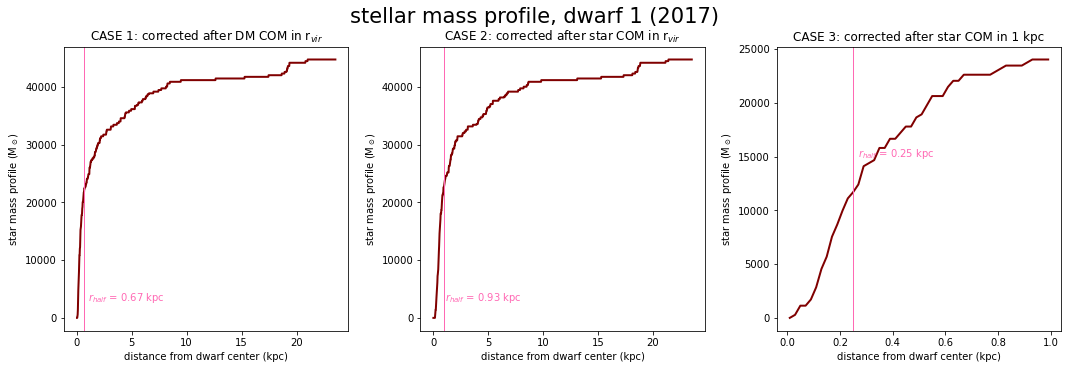

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])

# Plotting case 1:
ax1.plot(radius_array, mass_prof1, 'maroon', linewidth=2)
ax1.axvline(r_half1, color='hotpink', linewidth=1)
ax1.set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
#ax1.set_xlim([0, 22])
ax1.set_title('CASE 1: corrected after DM COM in r$_{vir}$')
#ax1.axhline(M_tot1, color='blue', linewidth=1)
#ax1.text(0.30, M_tot1 - 400, '''$M_{tot}$ = ''' + str(round(M_tot1, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax1.text(r_half1 + 0.3, 3000, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax1.set_box_aspect(1)

# Plotting case 2:
ax2.plot(radius_array, mass_prof2, 'maroon', linewidth=2)
ax2.axvline(r_half2, color='hotpink', linewidth=1)
ax2.set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
ax2.set_title('CASE 2: corrected after star COM in r$_{vir}$')
#ax2.set_xlim([0, 21])
#ax2.axhline(M_tot2, color='blue', linewidth=1)
#ax2.text(0.30, M_tot2 - 400, '''$M_{tot}$ = ''' + str(round(M_tot2, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax2.text(r_half2 + 0.1, 3000, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax2.set_box_aspect(1)

# Plotting case 3:
ax3.plot(radius_array_1kpc, mass_prof3, 'maroon', linewidth=2)
ax3.axvline(r_half3, color='hotpink', linewidth=1)
ax3.set(xlabel='distance from dwarf center (kpc)', ylabel='star mass profile (M$_\odot$)')
ax3.set_title('CASE 3: corrected after star COM in 1 kpc')
#ax3.set_xlim([0, 1])
#ax3.axhline(M_tot3, color='blue', linewidth=1)
#ax3.text(0.30, M_tot3 - 400, '''$M_{tot}$ = ''' + str(round(M_tot3, 3)) \
#         + ''' $M_{\odot}$''', fontsize=10, color='blue')
ax3.text(r_half3 + 0.02, 15000, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax3.set_box_aspect(1)

plt.suptitle('stellar mass profile, dwarf 1 (2017)', fontsize=21)
plt.tight_layout()
plt.show()

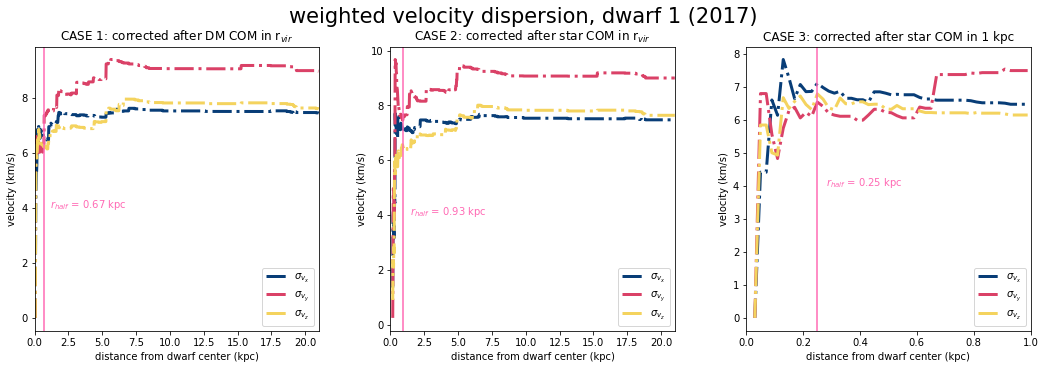

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])

# Plotting case 1:
ax1.plot(radius_array, stdev_x1, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax1.plot(radius_array, stdev_y1, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax1.plot(radius_array, stdev_z1, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax1.axvline(r_half1, color='hotpink')
ax1.text(r_half1 + 0.5, 4, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax1.set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax1.set_xlim([0, 21])
ax1.legend(loc='lower right')
ax1.set_box_aspect(1)
ax1.set_title('CASE 1: corrected after DM COM in r$_{vir}$')

# Plotting case 2:
ax2.plot(radius_array, stdev_x2, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax2.plot(radius_array, stdev_y2, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax2.plot(radius_array, stdev_z2, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax2.axvline(r_half2, color='hotpink')
ax2.text(r_half2 + 0.5, 4, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax2.set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax2.set_xlim([0, 21])
ax2.legend(loc='lower right')
ax2.set_box_aspect(1)
ax2.set_title('CASE 2: corrected after star COM in r$_{vir}$')

# Plotting case 3:
ax3.plot(radius_array_1kpc, stdev_x3, linewidth=3, linestyle='-.', color='#083D77', label='$\sigma_{v_x}$')
ax3.plot(radius_array_1kpc, stdev_y3, linewidth=3, linestyle='-.', color='#DA4167', label='$\sigma_{v_y}$')
ax3.plot(radius_array_1kpc, stdev_z3, linewidth=3, linestyle='-.', color='#F4D35E', label='$\sigma_{v_z}$')
ax3.axvline(r_half3, color='hotpink')
ax3.text(r_half3 + 0.03, 4, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
ax3.set(xlabel='distance from dwarf center (kpc)', ylabel='velocity (km/s)')
ax3.set_xlim([0, 1])
ax3.legend(loc='lower right')
ax3.set_box_aspect(1)
ax3.set_title('CASE 3: corrected after star COM in 1 kpc')

plt.suptitle('weighted velocity dispersion, dwarf 1 (2017)', fontsize=21)
plt.tight_layout()
plt.show()

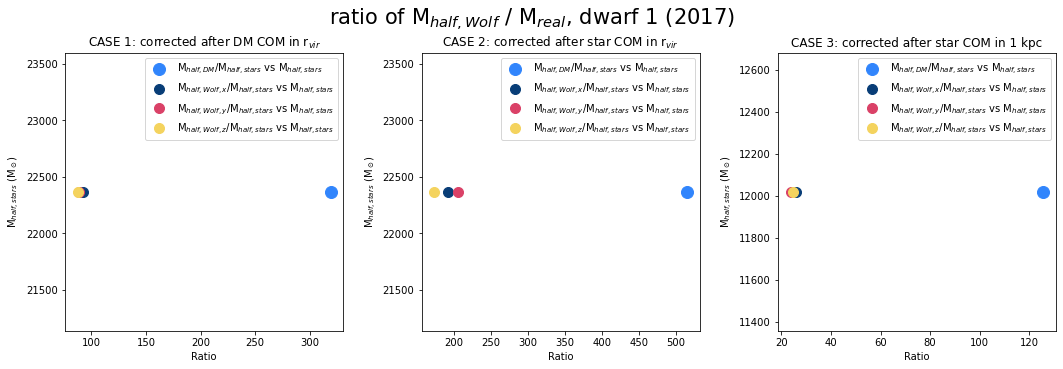

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])

# Plotting case 1:
ax1.plot(M_real1 / M_half1, M_half1, 'o', color='#3185FC', markersize=12, \
         label='M$_{half,DM}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax1.plot(M_wolf_x1 / M_half1, M_half1, 'o', color='#083D77', markersize=10, \
         label='M$_{half,Wolf,x}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax1.plot(M_wolf_y1 / M_half1, M_half1, 'o', color='#DA4167', markersize=10, \
         label='M$_{half,Wolf,y}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax1.plot(M_wolf_z1 / M_half1, M_half1, 'o', color='#F4D35E', markersize=10, \
         label='M$_{half,Wolf,z}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax1.set(xlabel='Ratio', ylabel='M$_{half,stars}$ (M$_\odot$)')
ax1.legend(loc='upper right')
ax1.set_box_aspect(1)
ax1.set_title('CASE 1: corrected after DM COM in r$_{vir}$')

# Plotting case 2:
ax2.plot(M_real2 / M_half2, M_half2, 'o', color='#3185FC', markersize=12, \
         label='M$_{half,DM}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax2.plot(M_wolf_x2 / M_half2, M_half2, 'o', color='#083D77', markersize=10, \
         label='M$_{half,Wolf,x}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax2.plot(M_wolf_y2 / M_half2, M_half2, 'o', color='#DA4167', markersize=10, \
         label='M$_{half,Wolf,y}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax2.plot(M_wolf_z2 / M_half2, M_half2, 'o', color='#F4D35E', markersize=10, \
         label='M$_{half,Wolf,z}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax2.set(xlabel='Ratio', ylabel='M$_{half,stars}$ (M$_\odot$)')
ax2.legend(loc='upper right')
ax2.set_box_aspect(1)
ax2.set_title('CASE 2: corrected after star COM in r$_{vir}$')

# Plotting case 3:
ax3.plot(M_real3 / M_half3, M_half3, 'o', color='#3185FC', markersize=12, \
         label='M$_{half,DM}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax3.plot(M_wolf_x3 / M_half3, M_half3, 'o', color='#083D77', markersize=10, \
         label='M$_{half,Wolf,x}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax3.plot(M_wolf_y3 / M_half3, M_half3, 'o', color='#DA4167', markersize=10, \
         label='M$_{half,Wolf,y}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax3.plot(M_wolf_z3 / M_half3, M_half3, 'o', color='#F4D35E', markersize=10, \
         label='M$_{half,Wolf,z}$/M$_{half,stars}$ vs M$_{half,stars}$')
ax3.set(xlabel='Ratio', ylabel='M$_{half,stars}$ (M$_\odot$)')
ax3.legend(loc='upper right')
ax3.set_box_aspect(1)
ax3.set_title('CASE 3: corrected after star COM in 1 kpc')

plt.suptitle('ratio of M$_{half,Wolf}$ / M$_{real}$, dwarf 1 (2017)', fontsize=21)
plt.tight_layout()
plt.show()

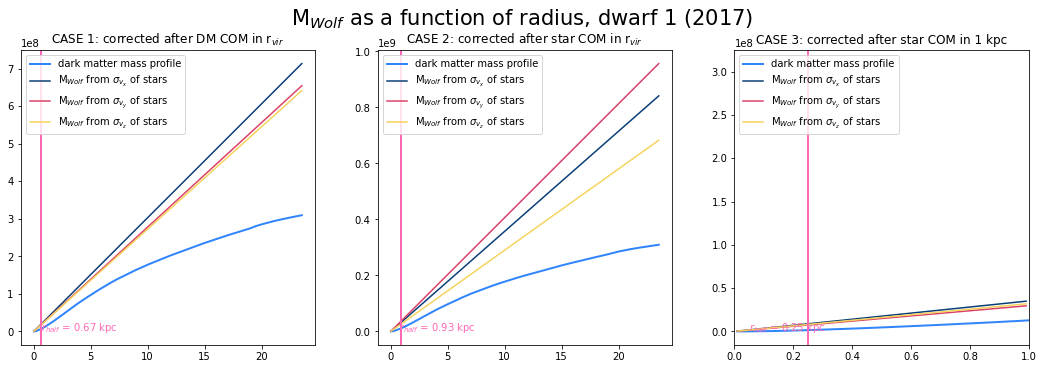

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[15, 5])

# Plotting case 1:
ax1.plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_halo1, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax1.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_x1), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax1.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_y1), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax1.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_z1), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax1.axvline(r_half1, color='hotpink', linewidth=2)
ax1.text(r_half1 - 0.02, 4e5, '''$r_{half}$ = ''' + str(round(r_half1, 3)) + ''' kpc''', fontsize=10, color='hotpink')
#ax1.set_ylim(0,0.75e6)
#ax1.set_xlim(0,1)
ax1.legend(loc='upper left')
ax1.set_box_aspect(1)
ax1.set_title('CASE 1: corrected after DM COM in r$_{vir}$')

# Plotting case 2:
ax2.plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_halo1, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax2.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_x2), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax2.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_y2), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax2.plot(radius_array, analyze.Wolf_mass_estimator(radius_array, stdev_at_rhalf_z2), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax2.axvline(r_half2, color='hotpink', linewidth=2)
ax2.text(r_half2 - 0.2, 5e5, '''$r_{half}$ = ''' + str(round(r_half2, 3)) + ''' kpc''', fontsize=10, color='hotpink')
#ax2.set_ylim(0,0.75e6)
#ax2.set_xlim(0,1)
ax2.legend(loc='upper left')
ax2.set_box_aspect(1)
ax2.set_title('CASE 2: corrected after star COM in r$_{vir}$')

# Plotting case 3:
ax3.plot(radius_array, analyze.dynamical_mass(radius_array, r_dm_halo1, bin_size), \
             color='#3185FC', linewidth=2, label="dark matter mass profile")
ax3.plot(radius_array_1kpc, analyze.Wolf_mass_estimator(radius_array_1kpc, stdev_at_rhalf_x3), \
         color='#083D77', label="M$_{Wolf}$ from $\sigma_{v_x}$ of stars")
ax3.plot(radius_array_1kpc, analyze.Wolf_mass_estimator(radius_array_1kpc, stdev_at_rhalf_y3), \
         color='#DA4167', label="M$_{Wolf}$ from $\sigma_{v_y}$ of stars")
ax3.plot(radius_array_1kpc, analyze.Wolf_mass_estimator(radius_array_1kpc, stdev_at_rhalf_z3), \
         color='#F4D35E', label="M$_{Wolf}$ from $\sigma_{v_z}$ of stars")
ax3.axvline(r_half3, color='hotpink', linewidth=2)
ax3.text(r_half3 - 0.2, 3e5, '''$r_{half}$ = ''' + str(round(r_half3, 3)) + ''' kpc''', fontsize=10, color='hotpink')
#ax3.set_ylim(0,0.75e6)
ax3.set_xlim(0,1)
ax3.legend(loc='upper left')
ax3.set_box_aspect(1)
ax3.set_title('CASE 3: corrected after star COM in 1 kpc')

plt.suptitle('M$_{Wolf}$ as a function of radius, dwarf 1 (2017)', fontsize=21)
plt.tight_layout()
plt.show()